# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** **Nisa Agni Afifah**
- **Email:** **agniafifah21@gmail.com**
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

* Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir? <br>
* Pada jam berapa aktivitas penyewaan sepeda mencapai jumlah tertinggi dan terendah? <br>
* Di musim apa tingkat penyewaan sepeda paling tinggi? <br>
* Seberapa besar preferensi pengguna terdaftar dibandingkan pengguna kasual? <br>

## Import Semua Packages/Library yang Digunakan

In [1]:
#Import semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Memuat tabel day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Memuat tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
#Memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df dan hour_df.
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
#Mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value di dataframe day_df dan hour_df 

In [7]:
#Memeriksa duplikasi 
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Tidak terdapat duplikat pada dataframe day_df dan hour_df 

In [8]:
#Memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Memeriksa parameter statistik dari kolom numerik yang terdapat di dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

1. Kolom workingday akan dihapus karena workingday sudah diwakili oleh weekday.
2. Kolom season, mnth, holiday, weekday, dan weathersit akan diubah dari integer ke kategori untuk mencerminkan sifat data yang diskret.
3. Kolom dteday akan dikonversi dari object ke datetime untuk analisis waktu  yang lebih efektif.
4. Mengubah nama kolom agar lebih mudah dibaca dan disesuaikan agar lebih deskriptif.
5. Nilai dalam beberapa kolom akan diubah untuk meningkatkan keterbacaan.
6. Kolom baru category_days akan ditambahkan untuk mengelompokkan hari menjadi weekend atau weekday.

#### Dropping

In [10]:
#Menghapus kolom workingday. karena workingday sudah diwakili oleh weekday.
day_df.drop(['workingday'], axis = 1, inplace= True)
hour_df.drop(['workingday'], axis = 1, inplace= True)

#### Mengubah Tipe Data

* int to category

In [11]:
#Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

* object to datetime


In [12]:
#Mengubah tipe data dteday yang tadinya 'object' menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Rename

##### Mengubah nama kolom agar lebih mudah dibaca di dataset

In [13]:
#Mengubah nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [14]:
#Mengubah nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

##### Mengkonversi isi kolom agar lebih mudah dipahami

In [15]:
#Konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

#Konversi month menjadi: 1:Jan, 2:Feb, ..., 12:Dec
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].replace(month_mapping)
hour_df['month'] = hour_df['month'].replace(month_mapping)

#Konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow
weather_mapping = {
    1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'
}
day_df['weather_situation'] = day_df['weather_situation'].replace(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].replace(weather_mapping)

#Konversi one_of_week menjadi: 0:Sun, 1:Mon, ..., 6:Sat
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
day_df['one_of_week'] = day_df['one_of_week'].replace(weekday_mapping)
hour_df['one_of_week'] = hour_df['one_of_week'].replace(weekday_mapping)

#Konversi year menjadi: 0:2011, 1:2012
year_mapping = {0: '2011', 1: '2012'}
day_df['year'] = day_df['year'].replace(year_mapping)
hour_df['year'] = hour_df['year'].replace(year_mapping)

#Menghitung Humidity
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100


C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\26186285.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\26186285.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\26186285.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is

##### Menambahkan kolom category_days untuk mengidentifikasi hari sebagai weekend atau weekday.

In [16]:
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [17]:
#Kategori kelembapan udara
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

 Dapat disimpulkan bahwa:

1. Kolom instant dan workingday telah berhasil dihapus ✓
2. Tipe data kolom dteday telah dikonversi menjadi datetime ✓
3. Kolom season, mnth, holiday, weekday, workingday, dan weathersit telah diubah dari tipe integer menjadi category ✓
4. Nama-nama kolom telah disesuaikan agar lebih mudah dipahami ✓
5. Isi kolom telah dikonversi untuk meningkatkan keterbacaan ✓
6. Kolom baru category_days telah dibuat untuk mengklasifikasikan hari sebagai weekend atau weekday ✓

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [18]:
#Melihat rangkuman parameter statistik dari data hour_df 
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN



Dari rangkuman parameter statistik di atas, dapat diketahui bahwa terdapat total 17.379 pelanggan. Rentang waktu penyewaan berlangsung dari pukul 00.00 hingga 23.59, dengan rata-rata penyewaan sepeda terjadi sekitar pukul 11.54 dan memiliki standar deviasi sebesar 6.91

In [19]:
#Penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan tabel pivot tersebut, dapat disimpulkan bahwa pada pukul 17.00 merupakan waktu dengan jumlah penyewaan sepeda terbanyak, sementara pada pukul 04.00 mencatatkan jumlah penyewaan sepeda paling sedikit.

### Explore Data day_df

In [20]:
#Melihat rangkuman parameter statistik dari data day_df 
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [21]:
#Melihat jumlah penyewaan tiap season 
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\1026455141.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Dapat disimpulkan bahwa season fall merupakan musim dengan jumlah penyewaan terbanyak dan season spring dengan jumlah pernyewaan sedikit.

In [22]:
#Melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul 
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Dapat dilihat seseorang yang sudah terdaftar (menjadi member) dengan yang casual memiliki nilai yang cukup jauh, pada tahun 2011 yang menjadi member sebanyak 995851 sedangkan yang casual sebanyak 247252 

## Visualization & Explanatory Analysis

* Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir? <br>
* Pada jam berapa aktivitas penyewaan sepeda mencapai jumlah tertinggi dan terendah? <br>
* Di musim apa tingkat penyewaan sepeda paling tinggi? <br>
* Seberapa besar preferensi pengguna terdaftar dibandingkan pengguna kasual? <br>


### Pertanyaan 1: Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir? ✓

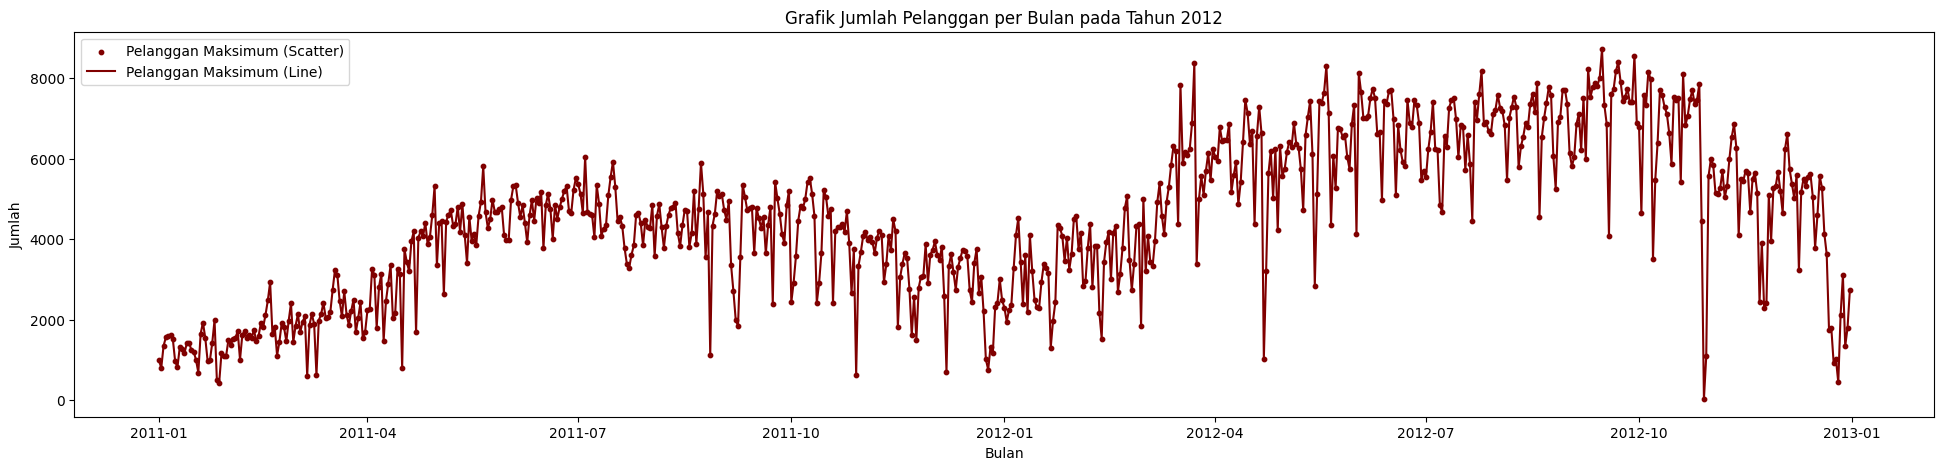

In [23]:
import matplotlib.pyplot as plt

#Membuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

#Menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

#Membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna #800000 dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#800000", s=10, marker='o', label="Pelanggan Maksimum (Scatter)")

#Membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values, c="#800000", label="Pelanggan Maksimum (Line)")

#Penamaan untuk sumbu x
plt.xlabel('Bulan')

#Penamaan untuk sumbu y
plt.ylabel('Jumlah')

#Judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah order terbanyak terjadi pada bulan September. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan November dan December. 


### Pertanyaan 2: Pada jam berapa aktivitas penyewaan sepeda mencapai jumlah tertinggi dan terendah? ✓

In [24]:
#Melakukan grouping terhadap hours dan count_cr 
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()


C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\2353748019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\2353748019.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


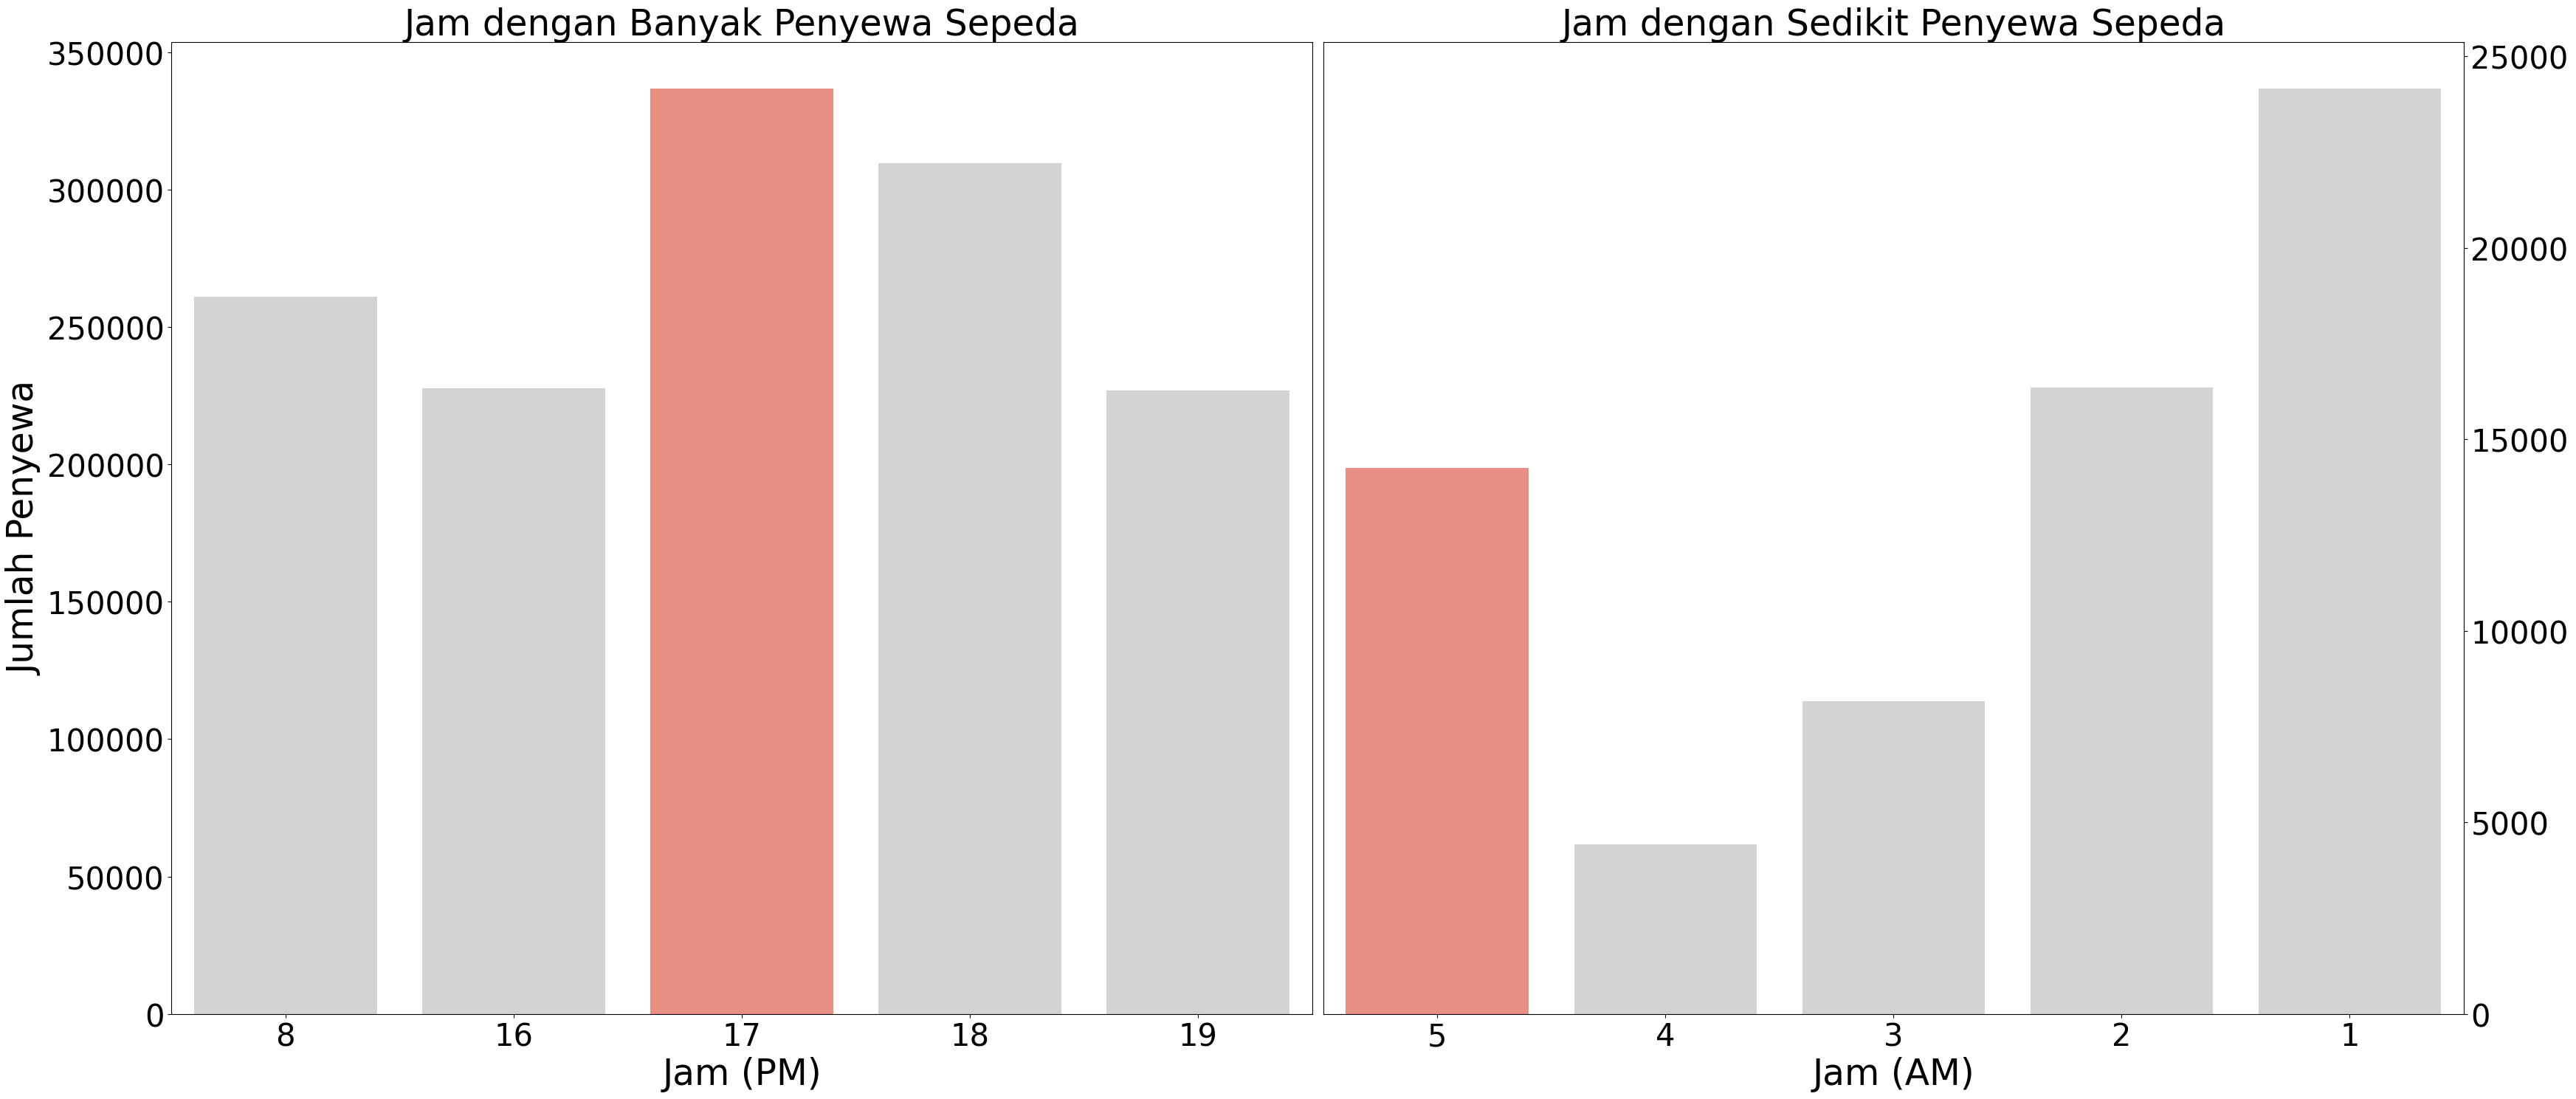

In [25]:
import seaborn as sns

#Membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

#Membuat barplot untuk jam dengan penyewa sepeda terbanyak
sns.barplot(
    x="hours", 
    y="count_cr", 
    data=sum_order_items_df.nlargest(5, "count_cr"), 
    palette=["#D3D3D3", "#D3D3D3", "#FA8072", "#D3D3D3", "#D3D3D3"], 
    ax=ax[0]
)

#Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel("Jumlah Penyewa", fontsize=35)
ax[0].set_xlabel("Jam (PM)", fontsize=35)
ax[0].set_title("Jam dengan Banyak Penyewa Sepeda", loc="center", fontsize=35)
ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=30)

#Membuat barplot untuk jam dengan penyewa sepeda tersedikit
sns.barplot(
    x="hours", 
    y="count_cr", 
    data=sum_order_items_df.nsmallest(5, "count_cr"), 
    palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#FA8072"], 
    ax=ax[1]
)

#Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jam (AM)", fontsize=35)
ax[1].set_title("Jam dengan Sedikit Penyewa Sepeda", loc="center", fontsize=35)
ax[1].invert_xaxis()  # Membalikkan urutan sumbu x
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=30)

#Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi di atas, dapat dilihat bahwa penyewaan sepeda paling tinggi atau banyak digunakan pada jam 17:00 sekitar 336860 penyewaan. Kontras dengan hal tersebut, penyewaan pada jam 04:00 penyewaan sepeda yang paling rendah sekitar 4428 penyewaan.  


### Pertanyaan 3: Pada musim apa tingkat penyewaan sepeda paling tinggi?  ✓

C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\2775725790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


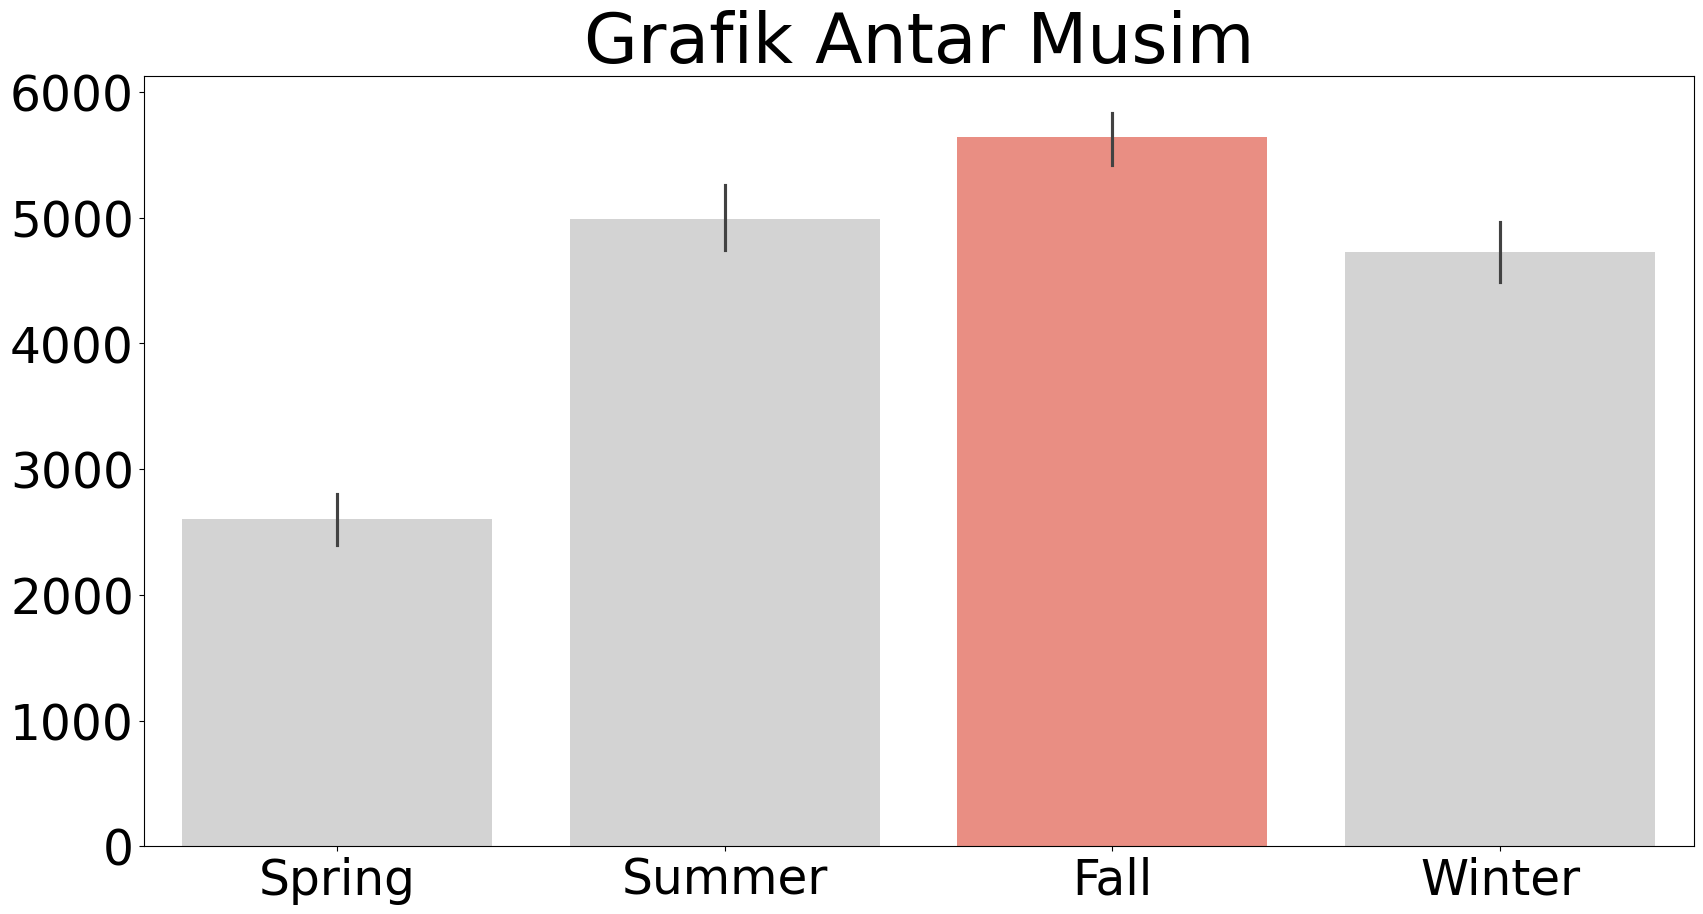

In [26]:
#Mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#FA8072", "#D3D3D3"]

#Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

#Membuat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr", 
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
#Mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)

#Menampilkan plot
plt.show()


 Pada musim Fall (musim gugur) adalah musim yang paling tinggi penyewaan sepeda dengan total sebanyak 1061129 penyewaan  

### Pertanyaan 4: Seberapa besar preferensi pengguna terdaftar dibandingkan pengguna kasual?  ✓



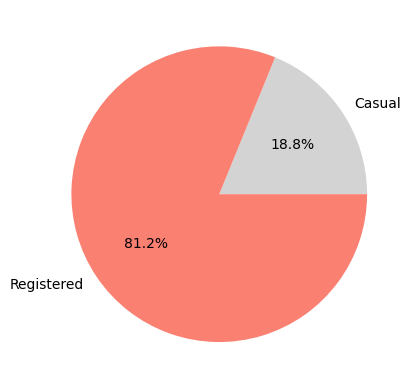

In [27]:
#Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

#Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

#Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

#Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#FA8072"])

#Menampilkan pie plot
plt.show()

Dari visualisasi diatas terdapat lebih besar preferensi pengguna yang terdaftar yaitu 81.2% dibanding pengguna yang casual hanya 18.8% 

## Conclusion

- Conclution pertanyaan 1 : Kinerja penjualan perusahaan dalam beberapa tahun terakhir yaitu pada bulan September jumlah order terbanyak dan pada bulan November dan Desember mengalami penurunan jumlah order yang cukup signifikan.
- Conclution pertanyaan 2 : Aktivitas penyewaan sepeda mencapai jumlah tertinggi pada jam 17:00 sekitar 336860 penyewaan. Kontras dengan hal tersebut, penyewaan pada jam 04:00 merupakan produk yang mencapai jumlah terendah  sekitar 4428 penyewaan.
- Conclution pertanyaan 3 :  Pada musim Fall (musim gugur) adalah musim yang paling tinggi penyewaan sepeda dengan total sebanyak 1061129 penyewaan.
- Conclution pertanyaan 4 : Preferensi pengguna terdaftar dibandingkan pengguna kasual yaitu lebih banyak pengguna terdaftar dengan perbandingan 81.2% terdaftar dan 18.8% casual.

## Analisis Lanjutan (Optional)

### 1. Analisis Clustering

#### Total Pengguna Berdasrkan weather_situation

In [28]:
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_4248\2433479576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

Dapat disimpulkan kelompok pengguna lebih cenderung menyewa sepeda pada hari-hari yang clear.

#### Total Pengguna Berdasarkan humadity_category

In [29]:
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


Dapat disimpulkan kelompok pegguna lebih cenderung menyewa sepeda pada humadity yang terlalu lembap

#### Total Pengguna Berdasarkan category_days

In [30]:
hour_df.groupby(by="category_days").agg({
    "count_cr": ["count"]})

,count_cr
,count
category_days,
weekdays,12365
weekend,5014


Dapat disimpulkan bahwa pengguna lebih banyak yang menyewa sepeda pada weekdays dibanding weekend.

### 2. RFM Analysis

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama: 
* Recency (seberapa baru pelanggan berinteraksi dengan bisnis).
* Frequency (banyaknya pelanggan dalam berinteraksi).
* Monetary (banyaknya uang yang mereka gunakan).

In [31]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  #Recency
    'instant': 'count',  #Frequency
    'count_cr': 'sum'  #Monetary
}).reset_index()

#Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


In [32]:
rfm_df.describe()

,registered,Recency,Frequency,Monetary
count,776.000000,776.000000,776.000000,776.000000
mean,393.960052,70.113402,22.395619,4243.143041
std,233.670785,76.739038,33.043852,2951.279938
min,0.000000,0.000000,1.000000,35.000000
25%,193.750000,15.000000,3.000000,1731.500000
50%,387.500000,45.000000,9.000000,3371.000000
75%,586.500000,101.000000,36.000000,6358.750000
max,886.000000,594.000000,307.000000,12095.000000


In [33]:
# Save the dataset to a CSV file
day_df.to_csv('dashboard/day_df_clean.csv', index=False)


In [34]:
# Save the dataset to a CSV file
hour_df.to_csv('dashboard/hour_df_clean.csv', index=False)
